In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transaction_ori = pd.read_csv("ieee-fraud-detection/train_transaction.csv")
identity_ori = pd.read_csv("ieee-fraud-detection/train_identity.csv")

In [3]:
transaction_ori

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transaction_ori.shape

(590540, 394)

In [5]:
transaction_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
identity_ori

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [7]:
identity_ori.shape

(144233, 41)

In [8]:
identity_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [9]:
transaction_ori.TransactionAmt.hasnans

False

## Violin Plot

[Text(0, 0, 'NO'), Text(1, 0, 'SI')]

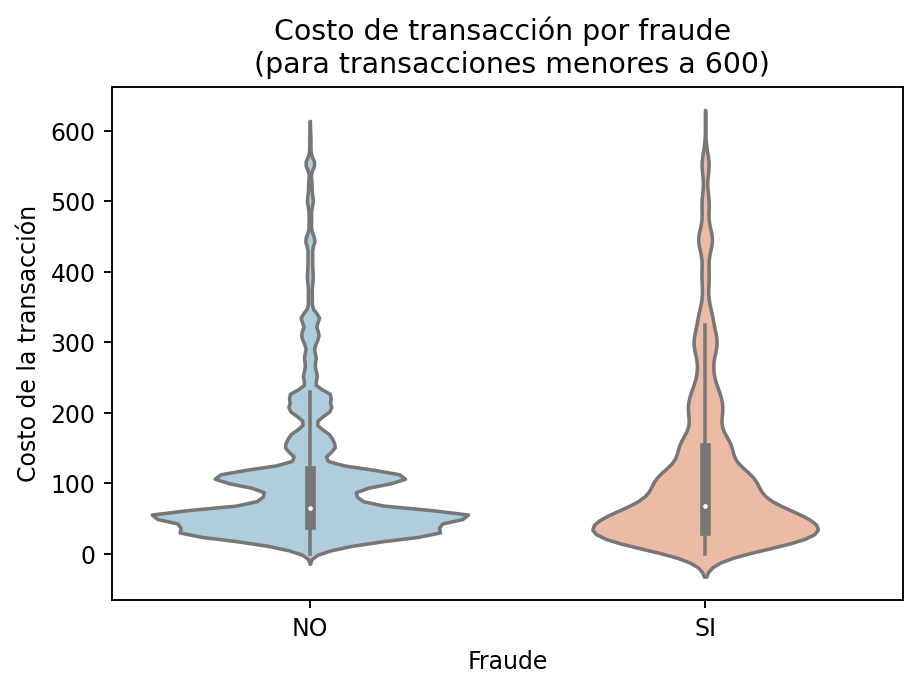

In [10]:
vp = transaction_ori.loc[transaction_ori.TransactionAmt < 600, ["TransactionAmt","isFraud"]]

fig, ax = plt.subplots(dpi=170)
sns.violinplot(y=vp.TransactionAmt,x=vp.isFraud, palette="RdBu_r", ax=ax, data=vp)
ax.set_ylabel('Costo de la transacción',fontsize=10)
ax.set_xlabel('Fraude',fontsize=10)
ax.set_title('Costo de transacción por fraude \n (para transacciones menores a 600)',fontsize=12)

#ax.set_yscale('log')
x_labels = ["NO", "SI"]
ax.set_xticklabels(x_labels,fontsize=10)

## Box Plot

[Text(0, 0, 'NO'), Text(1, 0, 'SI')]

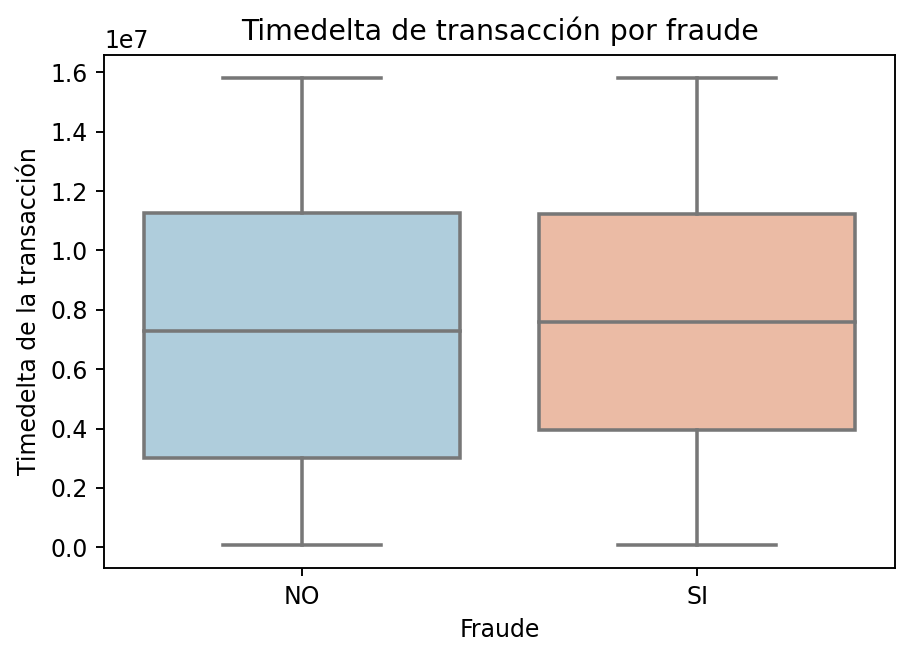

In [11]:
fig, ax = plt.subplots(dpi=170)
sns.boxplot(y=transaction_ori.TransactionDT,x=transaction_ori.isFraud, palette="RdBu_r", ax=ax, data=transaction_ori)
ax.set_ylabel('Timedelta de la transacción',fontsize=10)
ax.set_xlabel('Fraude',fontsize=10)
ax.set_title('Timedelta de transacción por fraude',fontsize=12)
#ax.set_yscale('log')
x_labels = ["NO", "SI"]
ax.set_xticklabels(x_labels,fontsize=10)

## HeatMap Plot

In [12]:
pt = pd.pivot_table(transaction_ori, values="isFraud", index="ProductCD", columns="card4", aggfunc="sum")
pt

card4,american express,discover,mastercard,visa
ProductCD,,,,
C,2.0,NaN,3072.0,4916.0
H,91.0,45.0,413.0,1024.0
R,111.0,56.0,373.0,885.0
S,35.0,77.0,200.0,374.0
W,NaN,336.0,2438.0,6174.0


Text(0.5, 35.027777777777786, 'Tarjeta')

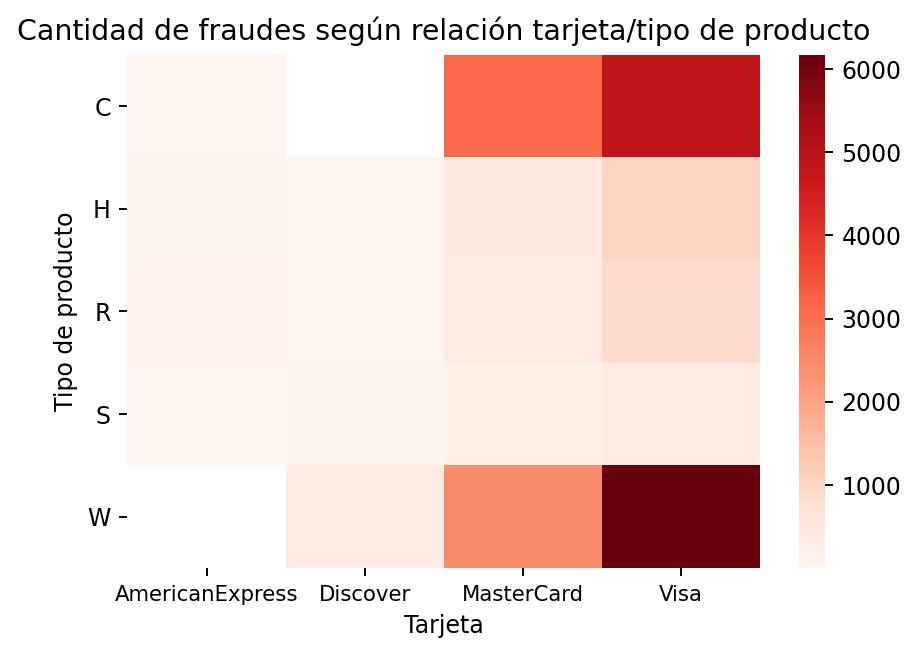

In [13]:
fig, ax = plt.subplots(dpi=170)
sns.heatmap(pt,cmap = "Reds")

ax.set_title('Cantidad de fraudes según relación tarjeta/tipo de producto',fontsize=12)
x_labels = ["AmericanExpress", "Discover", "MasterCard", "Visa"]

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set_xticklabels(x_labels,fontsize=9)

ax.set_ylabel('Tipo de producto',fontsize=10)
ax.set_xlabel('Tarjeta',fontsize=10)

## Bar Plots

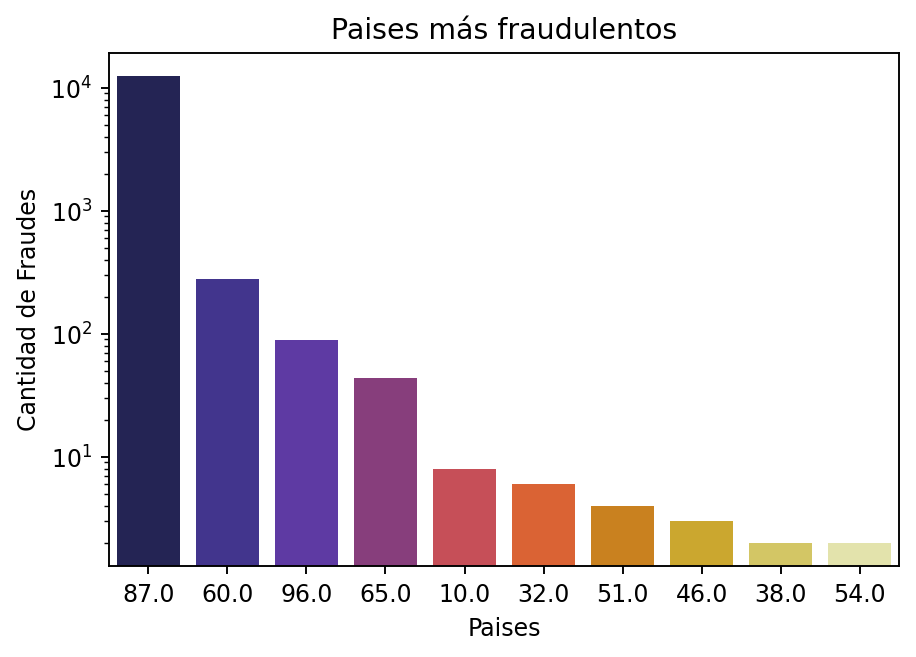

In [14]:
bp1 = transaction_ori.loc[:,["addr2","isFraud"]].groupby("addr2").agg({"isFraud":"sum"}).nlargest(10,"isFraud").reset_index()

fig, ax = plt.subplots(dpi=170)
sns.barplot(x=bp1.addr2, y=bp1.isFraud,palette = "CMRmap", order=bp1.addr2)
ax.set_title('Paises más fraudulentos',fontsize=12)
ax.set_ylabel('Cantidad de Fraudes',fontsize=10)
ax.set_xlabel('Paises',fontsize=10)
ax.set_yscale('log')

[Text(0, 0, 'gmail.com'),
 Text(1, 0, 'hotmail.com'),
 Text(2, 0, 'yahoo.com'),
 Text(3, 0, 'anonymous.com'),
 Text(4, 0, 'aol.com'),
 Text(5, 0, 'outlook.com'),
 Text(6, 0, 'comcast.net'),
 Text(7, 0, 'icloud.com'),
 Text(8, 0, 'mail.com'),
 Text(9, 0, 'msn.com')]

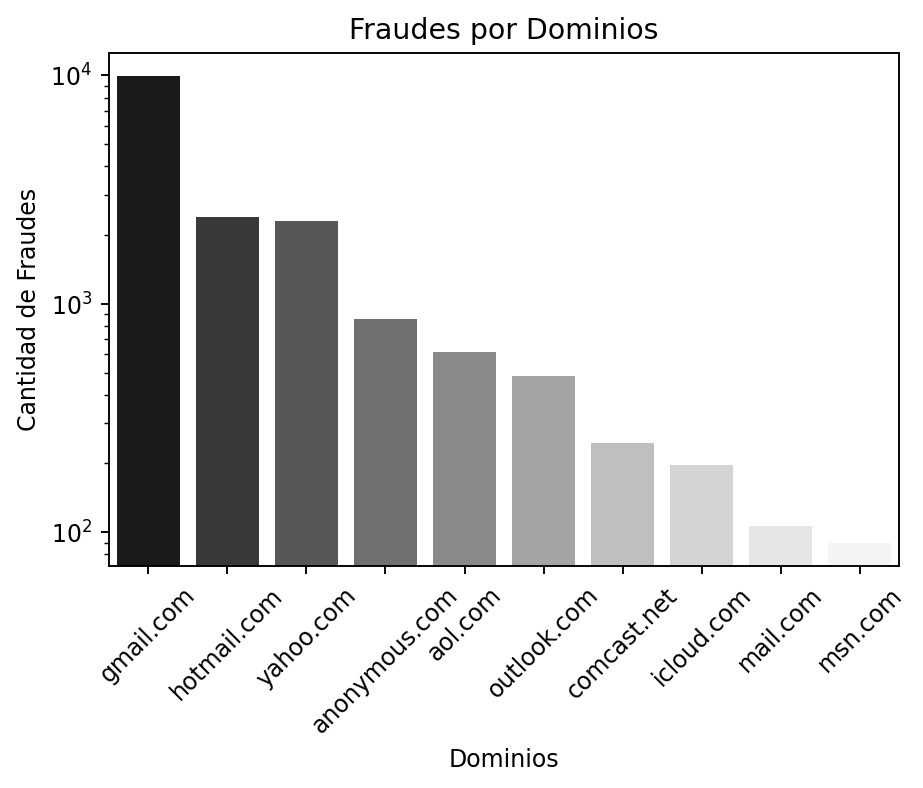

In [15]:
bp3 = transaction_ori.loc[:,["P_emaildomain","isFraud"]].groupby("P_emaildomain").agg({"isFraud":"sum"}).nlargest(10,"isFraud").reset_index()

fig, ax = plt.subplots(dpi=170)
sns.barplot(x=bp3.P_emaildomain, y=bp3.isFraud,palette = "Greys_r")
ax.set_title('Fraudes por Dominios',fontsize=12)
ax.set_ylabel('Cantidad de Fraudes',fontsize=10)
ax.set_xlabel('Dominios',fontsize=10)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [16]:
merge = transaction_ori.merge(identity_ori, on = "TransactionID", how = "left")
del transaction_ori
del identity_ori
merge

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


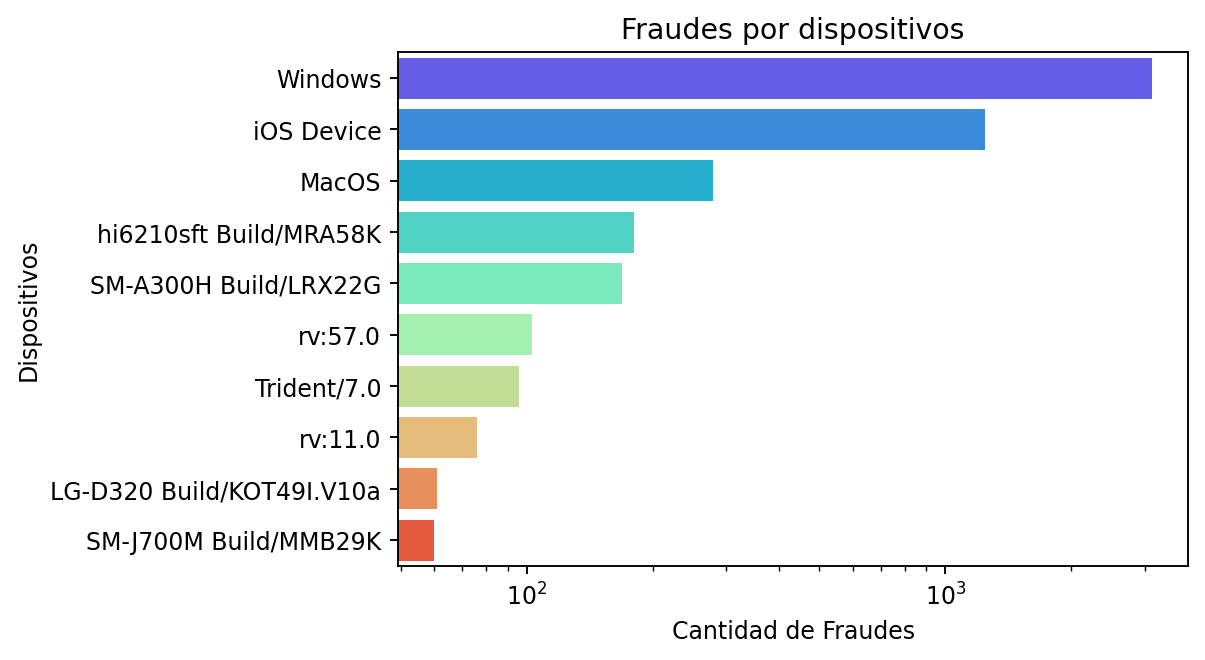

In [17]:
bp2 = merge.loc[:,["DeviceInfo","isFraud"]].groupby("DeviceInfo").agg({"isFraud":"sum"}).nlargest(10,"isFraud").reset_index()

fig, ax = plt.subplots(dpi=170)
ax = sns.barplot(x=bp2.isFraud, y=bp2.DeviceInfo,palette = "rainbow", orient = "h")
ax.set_title('Fraudes por dispositivos',fontsize=12)
ax.set_ylabel('Dispositivos',fontsize=10)
ax.set_xlabel('Cantidad de Fraudes',fontsize=10)
ax.set_xscale('log')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 70, fontsize=9)